In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# train split to validation
from sklearn.model_selection import train_test_split
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.175)


from keras.utils.np_utils import to_categorical
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32') / 255 
x_valid = x_valid.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)



11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10500, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def Model():

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [4]:
from keras.optimizers import RMSprop

model = Model()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# verbose = progress bar setting
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10500 samples
Epoch 1/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.2291 - acc: 0.9304 - val_loss: 0.0549 - val_acc: 0.9837
Epoch 2/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0814 - acc: 0.9760 - val_loss: 0.0348 - val_acc: 0.9891
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0616 - acc: 0.9818 - val_loss: 0.0269 - val_acc: 0.9912
Epoch 4/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0530 - acc: 0.9847 - val_loss: 0.0230 - val_acc: 0.9926
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0482 - acc: 0.9863 - val_loss: 0.0236 - val_acc: 0.9930
Epoch 6/10
60000/60000 [====

In [5]:
# model.save_weights("mnist.hdf5") 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.035985792518220844
Test accuracy: 0.9902


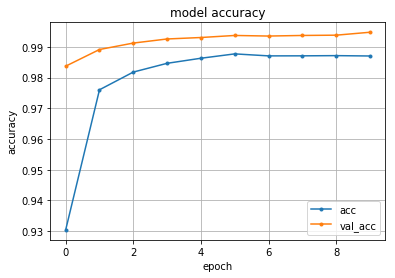

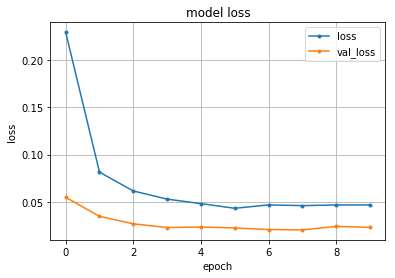

In [6]:
from matplotlib import pyplot as plt

# 精度のplot
plt.plot(history.history['acc'], marker='.', label='acc')
plt.plot(history.history['val_acc'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# 損失のplot
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()